In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import klib
import numpy as np
from scipy.stats import norm


In [37]:
# read in all tabs in the excel file into a dictionary where the keys are the tab names and the values are the data frames
data = pd.read_excel("TNX_20200129.xlsx", sheet_name=None)

In [38]:
data.keys()

dict_keys(['Data Set Details', 'Patient', 'Diagnosis', 'Medications', 'Lab Results', 'Vital Signs', 'Procedures', 'Terminology'])

In [83]:
# access each data frame by its tab name
df1 = data['Patient']
df2 = data['Diagnosis']
df3 = data['Medications']
df4 = data['Lab Results']
df5 = data['Vital Signs']
df6 = data['Procedures']
df7 = data['Terminology']

In [84]:
df_list = [df1, df2, df3, df4, df5, df6, df7]

In [85]:
df_names = ['patients', 'diagnosis', 'medications', 'labs', 'vitals', 'procedures', 'terminology']

# Loop through each dataframe in the list
for i, df in enumerate(df_list):
    # Get the sum of duplicated rows
    duplicates = df.duplicated().sum()

    # Print the number of duplicated rows
    print(f"Dataframe {df_names[i]} has {duplicates} duplicated rows.")

Dataframe patients has 0 duplicated rows.
Dataframe diagnosis has 16306 duplicated rows.
Dataframe medications has 2435 duplicated rows.
Dataframe labs has 1 duplicated rows.
Dataframe vitals has 0 duplicated rows.
Dataframe procedures has 0 duplicated rows.
Dataframe terminology has 0 duplicated rows.


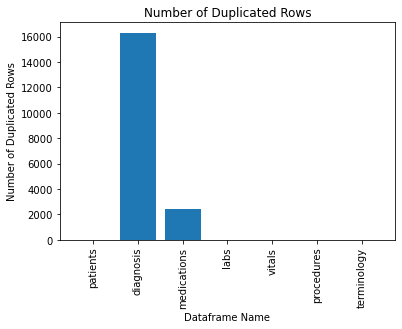

In [89]:
import matplotlib.pyplot as plt

df_names = ['patients', 'diagnosis', 'medications', 'labs', 'vitals', 'procedures', 'terminology']

# Loop through each dataframe in the list
duplicates_list = []
for i, df in enumerate(df_list):
    # Get the sum of duplicated rows
    duplicates = df.duplicated().sum()
    
    # Add the number of duplicated rows to the duplicates_list
    duplicates_list.append(duplicates)

# Plot the number of duplicated rows for each dataframe
plt.bar(df_names, duplicates_list)

# Add a title and labels to the x and y axes
plt.title('Number of Duplicated Rows')
plt.xlabel('Dataframe Name')
plt.ylabel('Number of Duplicated Rows')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

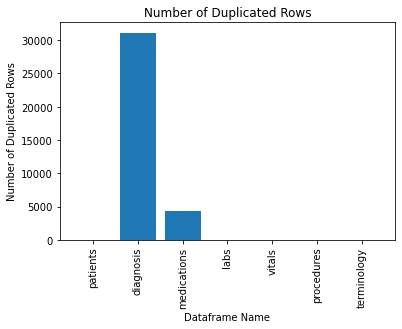

In [91]:
import matplotlib.pyplot as plt

df_names = ['patients', 'diagnosis', 'medications', 'labs', 'vitals', 'procedures', 'terminology']

# Loop through each dataframe in the list
duplicates_list = []
for i, df in enumerate(df_list):
    # Get the sum of duplicated rows
    duplicates = df.duplicated(keep=False).sum()
    
    # Add the number of duplicated rows to the duplicates_list
    duplicates_list.append(duplicates)

# Plot the number of duplicated rows for each dataframe
plt.bar(df_names, duplicates_list)

# Add a title and labels to the x and y axes
plt.title('Number of Duplicated Rows')
plt.xlabel('Dataframe Name')
plt.ylabel('Number of Duplicated Rows')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

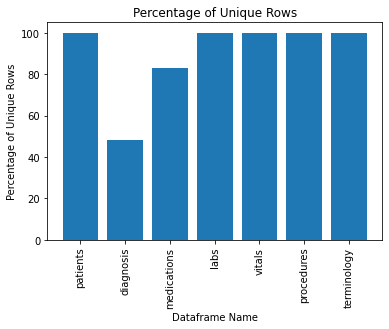

In [93]:
import matplotlib.pyplot as plt

df_names = ['patients', 'diagnosis', 'medications', 'labs', 'vitals', 'procedures', 'terminology']

# Loop through each dataframe in the list
unique_list = []
for i, df in enumerate(df_list):
    # Get the number of unique rows
    unique = df.drop_duplicates().shape[0]
    
    # Get the total number of rows
    total = df.shape[0]
    
    # Calculate the percentage of unique rows
    percentage = (unique / total) * 100
    
    # Add the percentage of unique rows to the unique_list
    unique_list.append(percentage)

# Plot the percentage of unique rows for each dataframe
plt.bar(df_names, unique_list)

# Add a title and labels to the x and y axes
plt.title('Percentage of Unique Rows')
plt.xlabel('Dataframe Name')
plt.ylabel('Percentage of Unique Rows')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [86]:
df1.describe()

,year_of_birth,age_at_death,postal_code
count,38.000000,3.000000,0.0
mean,1976.684211,60.333333,NaN
std,16.528608,5.131601,NaN
min,1940.000000,56.000000,NaN
25%,1965.250000,57.500000,NaN
50%,1979.500000,59.000000,NaN
75%,1988.500000,62.500000,NaN
max,2000.000000,66.000000,NaN


In [87]:
df1.head()

,patient_id,sex,race,ethnicity,year_of_birth,age_at_death,postal_code
0,fb5fe7dfa1a03f7d823c62e51d3f6a9ca96bc34a,F,Unknown,Not Hispanic or Latino,1980,NaN,NaN
1,c45f42c418ebd65d25d10276a3f2a8ba33d7d6c5,F,Unknown,Hispanic or Latino,1997,NaN,NaN
2,9cab24d7325547465b6439a5aea68b6efebace47,F,White,Hispanic or Latino,1970,NaN,NaN
3,22e3b3b96da711bdf73d24fe6886c083f12ca3e2,F,White,Not Hispanic or Latino,1984,NaN,NaN
4,580043e2b64b6e170ad284101375bdedd71ec231,M,White,Not Hispanic or Latino,1991,NaN,NaN


In [43]:
df1.dtypes

patient_id        object
sex               object
race              object
ethnicity         object
year_of_birth      int64
age_at_death     float64
postal_code      float64
dtype: object

The Patient table has 35 null values in the age_at_death column and 38 null values in the postal_code column.

In [44]:
df1.isnull().sum()

patient_id        0
sex               0
race              0
ethnicity         0
year_of_birth     0
age_at_death     35
postal_code      38
dtype: int64

The age at death attribute does not apear to have any suspect outlier values.

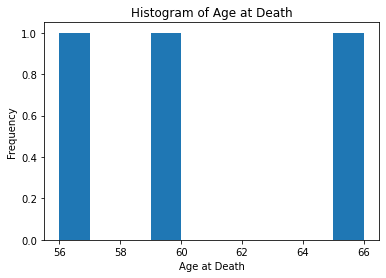

In [45]:
df1['age_at_death'].plot(kind='hist')
plt.xlabel('Age at Death')
plt.ylabel('Frequency')
plt.title('Histogram of Age at Death')
plt.show()

The Patient table has no duplicate rows.

In [46]:
df1.duplicated().sum()

0

GridSpec(6, 6)

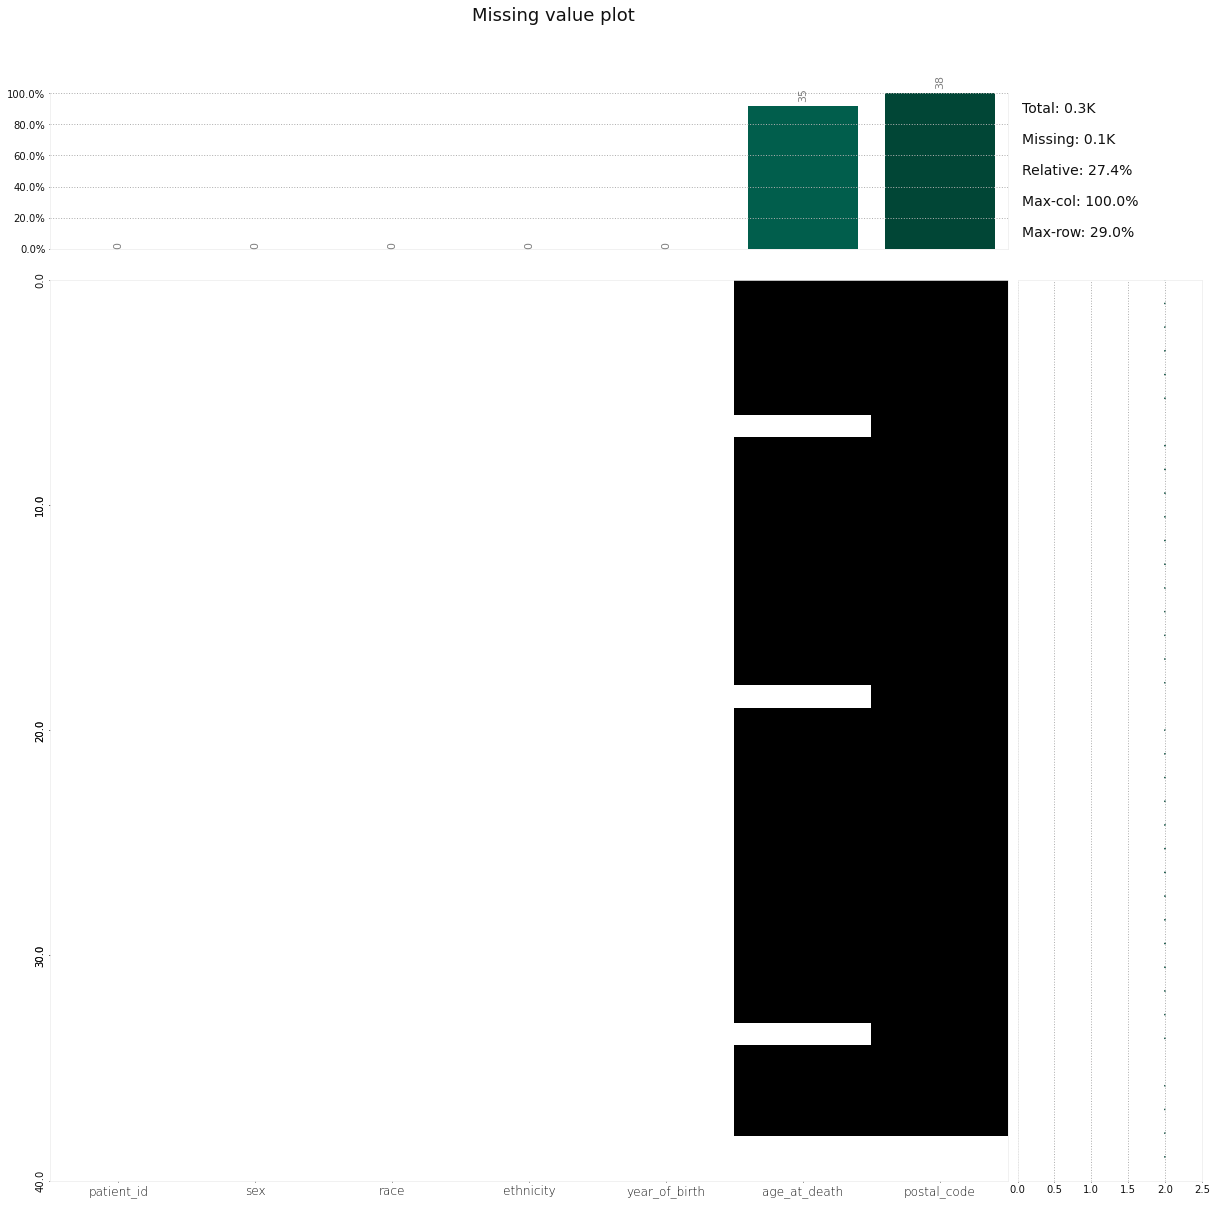

In [47]:
klib.missingval_plot(df1)

GridSpec(6, 4)

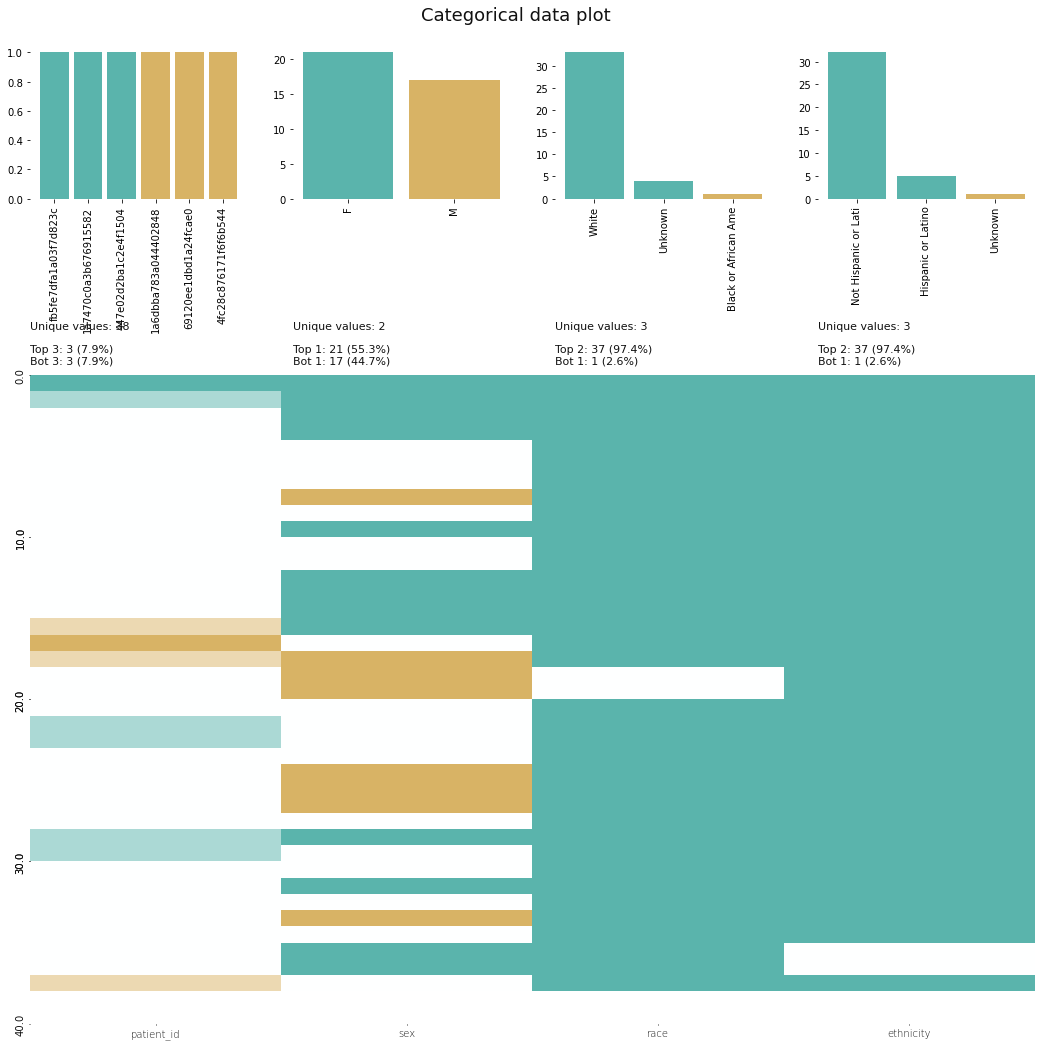

In [48]:
klib.cat_plot(df1)

array([[<AxesSubplot:title={'center':'year_of_birth'}>,
        <AxesSubplot:title={'center':'age_at_death'}>,
        <AxesSubplot:title={'center':'postal_code'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

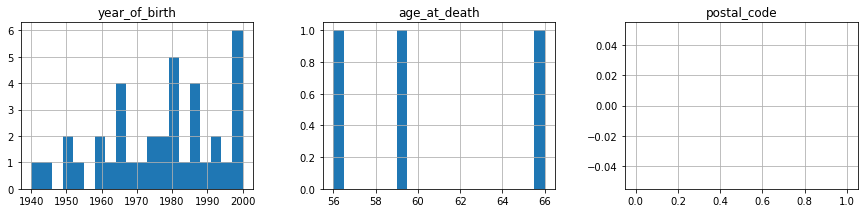

In [49]:
df1.hist(
    figsize=(15,15),
    layout=(4,3),
    bins=20
    )

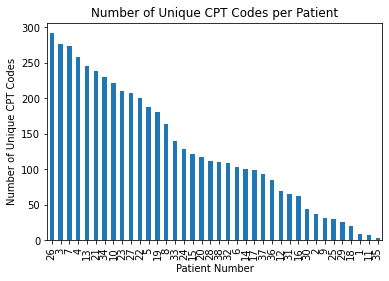

In [109]:
# Count the number of unique code values per patient_number
codes_per_patient = df6.groupby('patient_number')['code'].nunique()

# Sort the values from largest to smallest
codes_per_patient = codes_per_patient.sort_values(ascending=False)

# Plot the result
codes_per_patient.plot(kind='bar')

# Add a title and labels to the x and y axes
plt.title('Number of Unique CPT Codes per Patient')
plt.xlabel('Patient Number')
plt.ylabel('Number of Unique CPT Codes')

# Show the plot
plt.show()


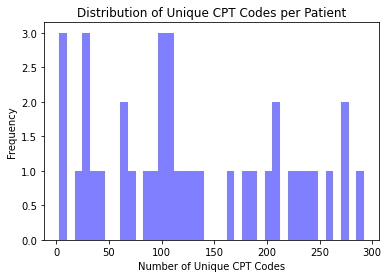

In [111]:
# Count the number of unique code values per patient_number
codes_per_patient = df6.groupby('patient_number')['code'].nunique()

# Plot the histogram
plt.hist(codes_per_patient, bins=40, color='blue', alpha=0.5)

# Add a title and labels to the x and y axes
plt.title('Distribution of Unique CPT Codes per Patient')
plt.xlabel('Number of Unique CPT Codes')
plt.ylabel('Frequency')

# Show the plot
plt.show()


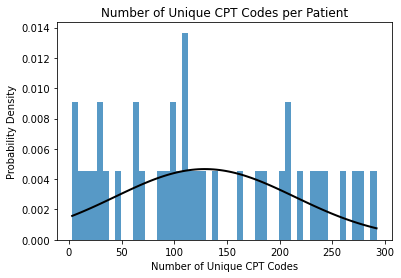

In [113]:
# Count the number of unique code values per patient_number
codes_per_patient = df6.groupby('patient_number')['code'].nunique()

# Plot the histogram of codes_per_patient
n, bins, patches = plt.hist(codes_per_patient, bins=50, density=True, alpha=0.75)

# Fit a normal distribution curve to the data
mu, std = norm.fit(codes_per_patient)
x = np.linspace(codes_per_patient.min(), codes_per_patient.max(), 100)
p = norm.pdf(x, mu, std)

# Overlay the normal distribution curve on the plot
plt.plot(x, p, 'k', linewidth=2)

# Add a title and labels to the x and y axes
plt.title('Number of Unique CPT Codes per Patient')
plt.xlabel('Number of Unique CPT Codes')
plt.ylabel('Probability Density')

# Show the plot
plt.show()

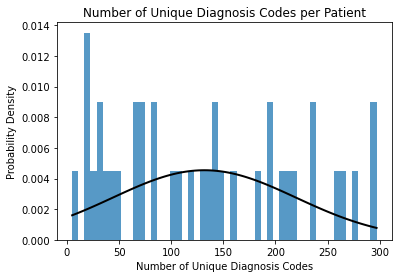

In [114]:
# Count the number of unique code values per patient_number
codes_per_patient = df2.groupby('patient_number')['code'].nunique()

# Plot the histogram of codes_per_patient
n, bins, patches = plt.hist(codes_per_patient, bins=50, density=True, alpha=0.75)

# Fit a normal distribution curve to the data
mu, std = norm.fit(codes_per_patient)
x = np.linspace(codes_per_patient.min(), codes_per_patient.max(), 100)
p = norm.pdf(x, mu, std)

# Overlay the normal distribution curve on the plot
plt.plot(x, p, 'k', linewidth=2)

# Add a title and labels to the x and y axes
plt.title('Number of Unique Diagnosis Codes per Patient')
plt.xlabel('Number of Unique Diagnosis Codes')
plt.ylabel('Probability Density')

# Show the plot
plt.show()

In [94]:
# Loop through each dataframe in the list
for i, df in enumerate(df_list):
    # Get the sum of duplicated rows
    duplicates = df.duplicated().sum()

    # Print the number of duplicated rows
    print(f"Dataframe {i} has {duplicates} duplicated rows.")


Dataframe 0 has 0 duplicated rows.
Dataframe 1 has 16306 duplicated rows.
Dataframe 2 has 2435 duplicated rows.
Dataframe 3 has 1 duplicated rows.
Dataframe 4 has 0 duplicated rows.
Dataframe 5 has 0 duplicated rows.
Dataframe 6 has 0 duplicated rows.


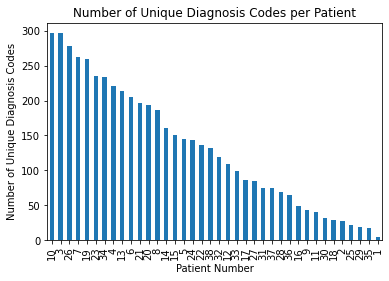

In [107]:
# Get a list of unique patient IDs
patient_ids = df2['patient_id'].unique()

# Create a new column to store the patient number
df2['patient_number'] = np.nan

# Loop through the list of unique patient IDs
for i, patient_id in enumerate(patient_ids):
    df2.loc[df2['patient_id'] == patient_id, 'patient_number'] = i + 1

df2['patient_number'] = df2['patient_number'].astype(int)# Count the number of unique code values per patient_id
codes_per_patient = df2.groupby('patient_number')['code'].nunique()

# Sort the values from largest to smallest
codes_per_patient = codes_per_patient.sort_values(ascending=False)

# Plot the result
codes_per_patient.plot(kind='bar')

# Add a title and labels to the x and y axes
plt.title('Number of Unique Diagnosis Codes per Patient')
plt.xlabel('Patient Number')
plt.ylabel('Number of Unique Diagnosis Codes')

# Show the plot
plt.show()

In [70]:
print(df6.columns)

Index(['patient_id', 'encounter_id', 'code_system', 'code', 'date',
       'derived_by_TriNetX'],
      dtype='object')


In [75]:
print(df2.columns)

Index(['patient_id', 'encounter_id', 'code_system', 'code', 'date',
       'derived_by_TriNetX'],
      dtype='object')


In [71]:
# Get the unique values in the code column
unique_codesystems = df6['code_system'].unique()

# Print the unique values
print(unique_codesystems)

['CPT' 'HCPCS' 'ICD-10-PCS' 'ICD-9-CM']


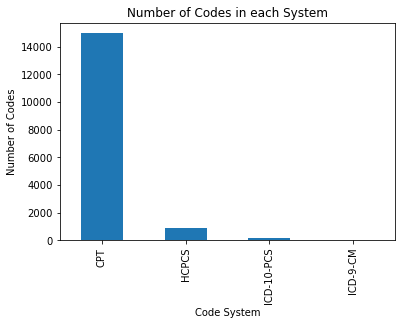

In [73]:
# Group the codes by code_system and count the number of codes for each system
code_system_counts = df6.groupby('code_system')['code'].count()

# Plot the results
code_system_counts.plot(kind='bar')

# Add a title and labels to the x and y axes
plt.title('Number of Codes in each System')
plt.xlabel('Code System')
plt.ylabel('Number of Codes')

# Show the plot
plt.show()

In [69]:
# Get the unique values in the code column
unique_codesystems = df2['code_system'].unique()

# Print the unique values
print(unique_codesystems)

['ICD-10-CM' 'ICD-9-CM']


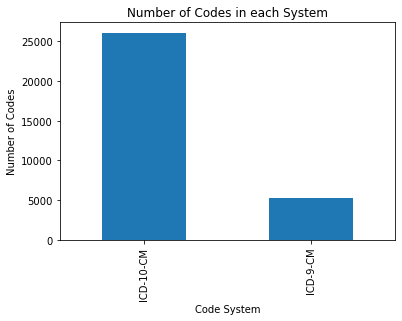

In [74]:
# Group the codes by code_system and count the number of codes for each system
code_system_counts = df2.groupby('code_system')['code'].count()

# Plot the results
code_system_counts.plot(kind='bar')

# Add a title and labels to the x and y axes
plt.title('Number of Codes in each System')
plt.xlabel('Code System')
plt.ylabel('Number of Codes')

# Show the plot
plt.show()